***Regularization parameter: Lasso***

The  𝜆  for lasso can var between 0 (no penalty, acts like OLS) and infinity. If  𝜆  is too large, all parameters will be set to zero.

Create a plot below of how  𝑅2  varies across different values of  𝜆  for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.

***Do lasso and ridge yield the same  𝑅2  for a given lambda value?***


***Thinkful Data Science Code Unit 3 / Lesson 3 / Project 3***


****Background on Ridge Regression****

Both ridge and lasso regression are very useful in having your training data set match or come close to the testing dataset which used OSL linear regression. 

First start by using **least squares** (minimum sum of least residuals) to fit the data. Accurately finds a relationship between X and Y variables. Randomly selecting a training data set from the original data we fit a new least squares OSL regression. Then we compare the variance between the training data and testing data. Since the training data has fewer data points the variance will be much lower. Whereas, the original (test data) has many more data point it will have much higher variance. The new line is overfit to our training data since it shows high variance within the testing data. 

Second, we use ridge regression to find a new line that does not match (fit) the training data as well. We are trying to reduce our overfitting of the training data modeling. Ridge regression we introduce a small set of bias of how the new line will fit the data. By introducing a small amount of bias we get a significant drop in variance. Ridge regression can provide better long-term predictions comes from introducing a small amount of bias to reduce the variance in the training data. 

Ridge regresson adds lambda x the slope squared to the OLS linear regression model. Slope squared adds a pentaly to the least squares method. When lambda = 1, we can see the effect of the slope squared. All the residuals are squared and squaring the residual slope. To minimize the sum of squared residuals plus the ridge regression pentaly (lambda X slope2), we would choose the ridge regression line over the least squares line. The least squares fit contains a large amount of variance in the model. Ridge regression model has smaller amount of variance due to the pentaly. 

Depending on the slope of line (relationship between variables) if the line is very steep, then the predication for the Y-variable is very sensitive to relatively small changes in X-variable. When the slope is small for every 1-unit increase in X-variable the Y-variable barely increases. Ridge regression line resulted in a small slope (less steep) meaning the ridge regression predication are less sensitive to X-variable then the least squares model. 

When lambda = 0 the slope 2 is also 0. Then the ridge regression will minimize the sum of the squared residuals, will be the same as the least squares line. As lambda increases the slope of the line gets even smaller (less steep). The larger the lambda the closer the slope will get to 0. The predication for Y gets less and less. In order to determine lambda value we need to use a cross validation (10-fold cross validation) to determine the best result for lambda. 

Ridge regression can work on continuous and discrete variables. In a linear model ridge regression works to find the difference between the training and testing models. Again, it works to minimize least squared residuals, plus lambda X discrete varialbe squared. When lambda increases (gets large) our prediction for the Y-variable on the Discrete X-variables becomes less sensitive between discrete variables. 

Ridge regression with logistic regression, ridge regression optimizes the sum of the likihoods instead of the squared residuals. Ridge regression can be applyied to multiple regressions (lambda x (slope squared + line difference squared)) everything except for the y-intercept. 

Ridge regression can help solve regression models with 10,000 variables with using only 500 or fewer variables. It can solve for parameters when there isn't even data. Using ridge regression we can find a solution with cross validation and ridge regression penalty which favors smaller parameter values. 

**Background on Lasso regression** is very similar to ridge regression. 

Like ridge regression Lasso regression results in a line that has a little bit of bias. It is calucated by from the sum of the squared residuals plus lambda x |the slope| (absolute value). It works by making the prediction of Y-variable less sensitive to training data set. Both ridge and lasso can be applied in the same setting. 

As lambda increases in value the slope gets smaller (less steep). The big difference between ridge and lasso regression is the ridge regression can only shrink the slope asymptotically close to 0 while Lasso regression can shrink the slope all the way to 0. 

In lasso regression the slope and line difference will shrink a little bit. Additional parameters will shrink all the way to 0. We are left with a simplified equation: 

Example: size = y-intercept + slope x weight + diet difference X high fat diet 

Ridge regression tends to do a little better when most variables are useful. Ridge regression squares the variables and lasso regression takes the absolute value. Lasso regression can exclude useless variables from the equation. 



In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [23]:
df = pd.read_csv(
    'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/credit-card-defaults.csv'
).iloc[:,1:].dropna()

df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [24]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.


# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


In [25]:
df.head()

,default,student,balance,income
0,-0.185599,-0.645936,-0.218835,0.813187
1,-0.185599,1.548141,-0.037616,-1.605496
2,-0.185599,-0.645936,0.492410,-0.131212
3,-0.185599,-0.645936,-0.632893,0.164031
4,-0.185599,-0.645936,-0.102791,0.370915


C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.854451e-23
  overwrite_a=True).T
C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  del sys.path[0]
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\ridge.py

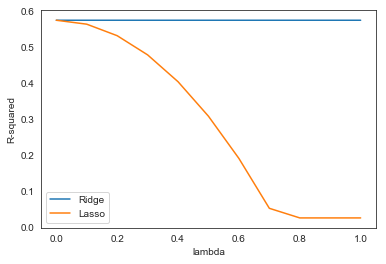

In [27]:
# Store estimates.
estimates = [None,None,None]

# Storing legend information.
labels = []

#Run the model for many alphas.
for lambd in [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]:
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    
    lassBig = linear_model.Lasso(alpha=lambd)
    lassBig.fit(X_train2, Y_train)
    
    estimates = np.row_stack((
        estimates,
        [ridgeregrBig.score(X_train2, Y_train),lassBig.score(X_train2, Y_train),lambd]))

# Make the data pretty.
estimates_df = pd.DataFrame(
    estimates,
    columns=['Ridge','Lasso','lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

# Plot a line for each parameter.
for var in ['Ridge','Lasso']:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('R-squared')
plt.legend(labels)
plt.show()

***Discussion***

In this challenge, as we increase lambda for both ridge and lasso regression (see plot above). As lambda increases from 0 to 1.0 for ridge regression the R-squared remains the same value. However, when we use lasso regression there is a significant drop in R-squared as lambda increases. This is due to lasso regression drops other parameters which in turn reduces the R-squared value. 

https://stats.stackexchange.com/questions/7225/estimating-r-squared-and-statistical-significance-from-penalized-regression-mode

Having said all that above, R2 is probably not a particularly good quantity to calculate, especially when you have lots of variables (because that's pretty much all R2 tells you: you have lots of variables). I would calculate something more like a "prediction error" using cross validation.

Ideally this "prediction error" should be based on the context of your modeling situation. You basically want to answer the question "How well does my model reproduce the data?". The context of your situation should be able to tell you what "how well" means in the real world. You then need to translate this into some sort of mathematical equation.

R-squared is not a good measure to evaluate lasso regression. 
https://stats.stackexchange.com/questions/350484/why-is-r-squared-not-a-good-measure-for-regressions-fit-using-lasso

This is because lasso regression parses the number of parameters in the model. 

"The goal of using LASSO is obtaining a sparse representation (of a predicted quantity) in the sense of not having many covariates. Comparing models with R2 tends to favor models with lots of covariates: in fact, adding covariates unrelated to the outcome will never decrease R2 and almost always increases it at least a little bit. The LASSO model will identify the model with the optimal penalized log-likelihood (an unpenalized log-likelihood is monotonically related to the R2). Validation statistics that are more widely used to compare LASSO models to other types of models are, for instance, the BIC or cross-validated R2." 